# 1. Project LIDA

LIDA is a library for generating data visualizations and data-faithful infographics. LIDA is grammar agnostic (will work with any programming language and visualization libraries e.g. matplotlib, seaborn, altair, d3 etc) and works with multiple large language model providers (OpenAI, Azure OpenAI, PaLM, Cohere, Huggingface).Details on the components of LIDA are described in [this paper](https://arxiv.org/abs/2303.02927) - star [this project](https://aka.ms/lida/github) for updates. 

LIDA _treats visualizations as code_ and provides a clean api for generating, executing, editing, explaining, evaluating and repairing visualization code. Here are some tasks you can execute with LIDA.

- ✅ Data Summarization
- ✅ Goal Generation
- ✅ Visualization Generation
- ⬜️ Visualization Editing
- ✅ Visualization Explanation
- ⬜️ Visualization Evaluation and Repair
- ✅ Visualization Recommendation
- ⬜️ Infographic Generation (beta) # pip install lida[infographics]

![LIDA Modules illustrated](https://github.com/microsoft/lida/raw/main/docs/images/lidamodules.jpg)

## 1. Data Summarization
Given a dataset, generate a compact summary of that data in a compact natural language representation that serves as context for subsequent tasks. The goal of the summarizer is to _produce an dense-but-compact information summary for a given dataset that is useful as grounding context for visualization tasks_. The grounding context is defined as one that contains information an analyst would need to understand the dataset and the tasks that can be performed on it.

See [paper](https://arxiv.org/pdf/2303.02927.pdf) for details

In [1]:
# Setup
from lida import Manager, TextGenerationConfig , llm  

csvfile = "./../1-data/kaggle/IPL-2022.csv"
lida = Manager(text_gen = llm("openai")) # palm, cohere .
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo-0301", use_cache=True)

In [2]:
# Summarize
summary = lida.summarize(csvfile)
summary_data = list(summary.keys())
for keys in summary_data:
    print(keys, ":", summary[keys])

name : IPL-2022.csv
file_name : IPL-2022.csv
dataset_description : 
fields : [{'column': 'match_id', 'properties': {'dtype': 'number', 'std': 21, 'min': 1, 'max': 74, 'samples': [5, 64, 19], 'num_unique_values': 74, 'semantic_type': '', 'description': ''}}, {'column': 'date', 'properties': {'dtype': 'string', 'samples': ['May 15,2022', 'May 21,2022', 'March 26,2022'], 'num_unique_values': 62, 'semantic_type': '', 'description': ''}}, {'column': 'venue', 'properties': {'dtype': 'category', 'samples': ['Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai', 'Narendra Modi Stadium, Ahmedabad'], 'num_unique_values': 6, 'semantic_type': '', 'description': ''}}, {'column': 'team1', 'properties': {'dtype': 'category', 'samples': ['Lucknow', 'Delhi', 'Kolkata'], 'num_unique_values': 9, 'semantic_type': '', 'description': ''}}, {'column': 'team2', 'properties': {'dtype': 'category', 'samples': ['Chennai', 'Mumbai', 'Gujarat'], 'num_unique_values': 9, 'semantic_type': '', 'description': ''}}, {

## 2. Goal Generation

Given the dataset "context" generated by the summarizer, the LLM must now _generate a question (hypothesis), a visualization (that addresses the question) and a rationale (for that visualization)_. The research found that requiring the LLM to produce a rationale led to more semantically meaningful goals.

The generation API takes these parameters - the summary, the number of goals to generate (n) and a persona (optional) that influences the tone or context for the goals generated. And the textgen_config that configures parameters for the given model.

See [paper](https://arxiv.org/pdf/2303.02927.pdf) for details

In [3]:
# generate 5 goals from the summary - with the persona is a fan of the Mumbai team
goals = lida.goals(summary, n=5, textgen_config=textgen_config, persona="fam of the Mumbai team who wants to see their stats") # exploratory data analysis

# create a list of dictionaries containing the goal information
import pandas as pd
goal_list = []
for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the performance of Mumbai team in the tournament?

**Visualization:** `Line chart of Mumbai team's scores in each match`

**Rationale:** This visualization will help the 'fan of the Mumbai team who wants to see their stats' persona to track the performance of the Mumbai team throughout the tournament. The line chart will show the trend of scores and help the persona to identify the matches where the team performed well or poorly.



### Goal 1
---
**Question:** How does the toss decision affect the match outcome?

**Visualization:** `Stacked bar chart of toss decision and match outcome`

**Rationale:** This visualization will help the persona to understand the impact of toss decision on the match outcome. The stacked bar chart will show the number of matches won and lost by each team based on their toss decision.



### Goal 2
---
**Question:** Who are the top scorers of the tournament?

**Visualization:** `Bar chart of top 10 scorers`

**Rationale:** This visualization will help the persona to identify the top scorers of the tournament. The bar chart will show the scores of top 10 scorers and help the persona to compare their performance.



### Goal 3
---
**Question:** Which team has the best bowling figures?

**Visualization:** `Bar chart of best bowling figures by team`

**Rationale:** This visualization will help the persona to identify the team with the best bowling figures in the tournament. The bar chart will show the best bowling figures by each team and help the persona to compare their performance.



### Goal 4
---
**Question:** What is the distribution of match margins?

**Visualization:** `Histogram of match margins`

**Rationale:** This visualization will help the persona to understand the distribution of match margins in the tournament. The histogram will show the frequency of match margins and help the persona to identify the matches with close or one-sided results.


In [4]:

# generate 10 goals from the summary with default persona
goals = lida.goals(summary, n=10, textgen_config=textgen_config,) # exploratory data analysis

# create a list of dictionaries containing the goal information
import pandas as pd
goal_list = []
for goal in goals:
    goal_dict = {'Question': goal.question, 'Visualization': goal.visualization, 'Rationale': goal.rationale}
    goal_list.append(goal_dict)
df = pd.DataFrame(goal_list)
display(df)

,Question,Visualization,Rationale
0,Which team has won the most matches?,Bar chart of match_winner,This will help us identify the most successful...
1,What is the distribution of first innings scores?,Histogram of first_ings_score,This will help us understand the range of scor...
2,What is the distribution of second innings sco...,Histogram of second_ings_score,This will help us understand the range of scor...
3,Which team has the highest average score in th...,Bar chart of first_ings_score grouped by team1,This will help us identify the team with the b...
4,Which team has the highest average score in th...,Bar chart of second_ings_score grouped by team2,This will help us identify the team with the b...
5,What is the distribution of winning margins?,Histogram of margin,This will help us understand the range of winn...
6,What is the average winning margin?,Bar chart of margin,This will help us understand the average diffe...
7,What is the distribution of player of the matc...,Bar chart of player_of_the_match,This will help us identify the most outstandin...
8,Which venue has hosted the most matches?,Bar chart of venue,This will help us identify the most popular ve...
9,What is the distribution of toss decisions?,Pie chart of toss_decision,This will help us understand the preference of...


## 3. Visualization Generation

<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Charts length: 1


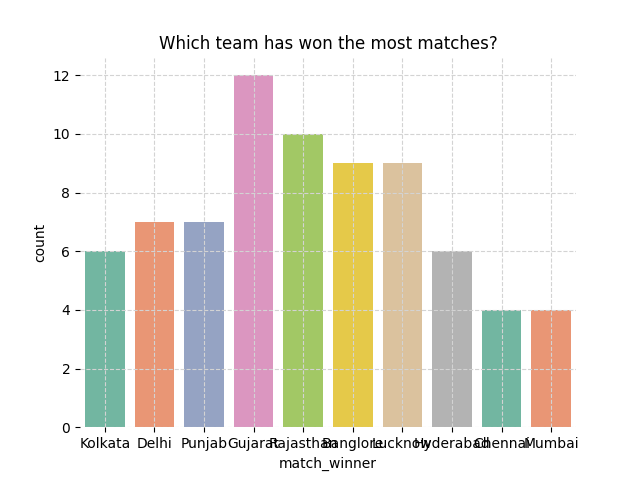

In [5]:
# Visualize A Goal 
charts = lida.visualize(summary=summary, goal=goals[0]) # exploratory data analysis
print("Charts length:", len(charts))
charts[0]

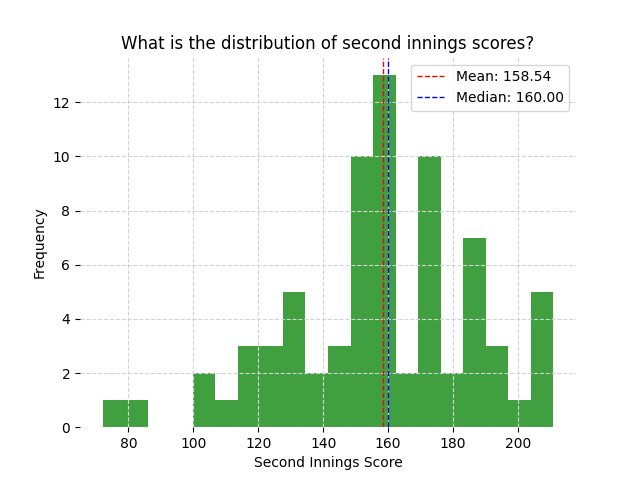

In [6]:
# Visualize a Goal - and specify a library
target = goals[2]
library = "matplotlib"
charts = lida.visualize(summary=summary, goal=target, library=library) # exploratory data analysis
charts[0]

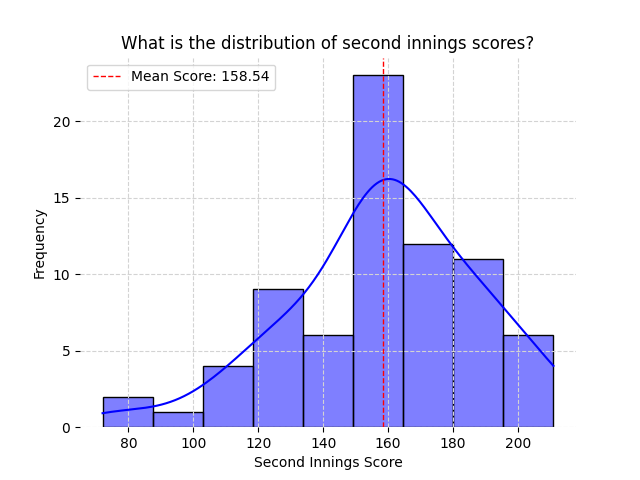

In [7]:
# Visualize it again - and specify a different library and textgen_config (change temperature)
target = goals[2]
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=target,library=library,textgen_config=textgen_config) # exploratory data analysis
charts[0]

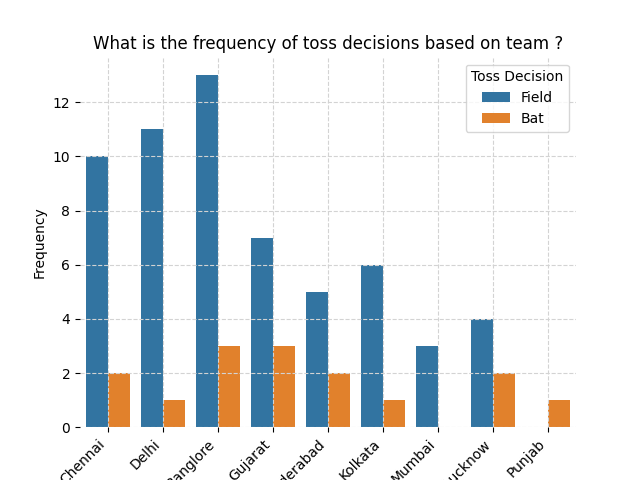

In [8]:
# Use natural language user query instead of pre-formulated goal
user_query = "What is the frequency of toss decisions based on team ?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

## 4. Visualization Explanation

In [9]:
# Explain visualization
explanation = lida.explain(code=charts[0].code)
for obj in explanation[0]:
    display(obj)


{'section': 'accessibility',
 'code': "sns.countplot(x='team1', hue='toss_decision', data=data)\nplt.title('What is the frequency of toss decisions based on team ?', wrap=True)\nplt.legend(title='Toss Decision', loc='upper right')\nplt.xlabel('Team')\nplt.ylabel('Frequency')\nplt.xticks(rotation=45, ha='right')",
 'explanation': 'The chart is a countplot with the x-axis representing the teams and the hue representing the toss decision. The goal of the chart is to show the frequency of toss decisions based on team. The main insights from the chart are which teams tend to choose which toss decision.'}

{'section': 'transformation',
 'code': 'None',
 'explanation': 'There is no data transformation in this code.'}

{'section': 'visualization',
 'code': "sns.countplot(x='team1', hue='toss_decision', data=data)\nplt.title('What is the frequency of toss decisions based on team ?', wrap=True)\nplt.legend(title='Toss Decision', loc='upper right')\nplt.xlabel('Team')\nplt.ylabel('Frequency')\nplt.xticks(rotation=45, ha='right')\nreturn plt;",
 'explanation': "The visualization code first creates a countplot using seaborn's countplot function. It then sets the chart title using plt.title and adds a legend with the title 'Toss Decision' using plt.legend. The x-axis label is set to 'Team' using plt.xlabel and the y-axis label is set to 'Frequency' using plt.ylabel. Finally, the x-axis tick labels are rotated 45 degrees and aligned to the right using plt.xticks. The function returns the plot object."}

In [10]:
# Edit visualization - modify using natural language -- insufficient tokens in model to run this
#instructions = ["change the color to green", "translate the title to french"]
# edited_charts = lida.edit(code=charts[0],  summary=summary, instructions=instructions)

## 5. Visualization Recommendation

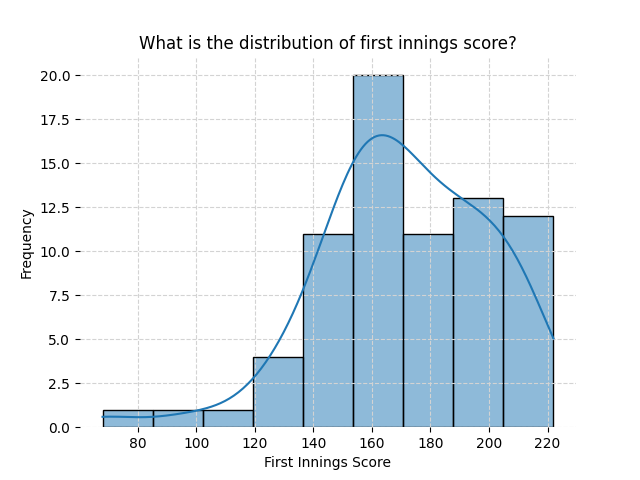

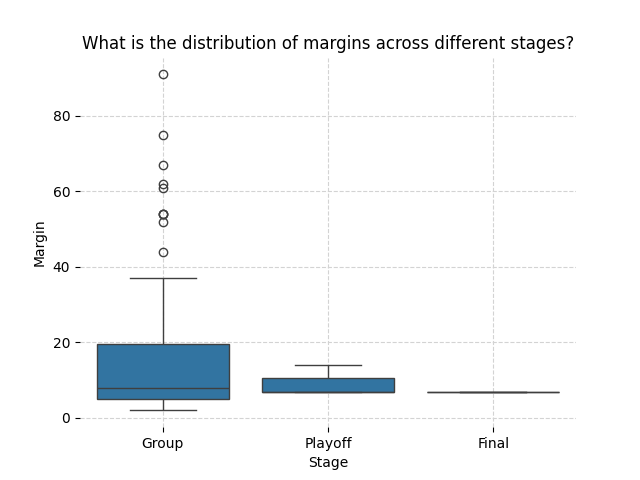

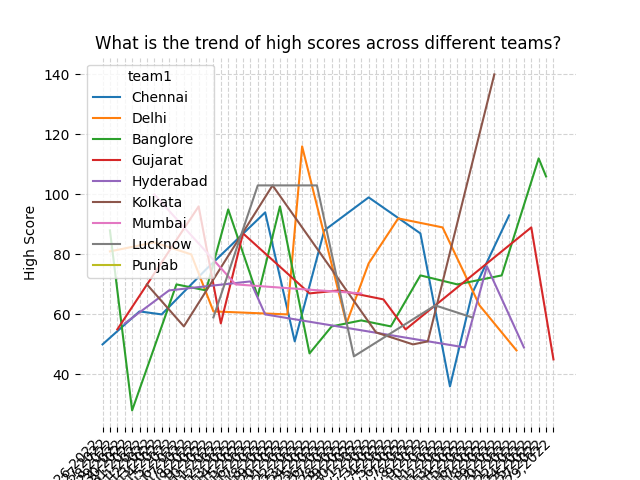

In [11]:
# Recommend 3 visualizations 
recommendations = lida.recommend(code=charts[0].code, summary=summary, n=3,  textgen_config=textgen_config)

for chart in recommendations:
    display(chart) 

<string>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


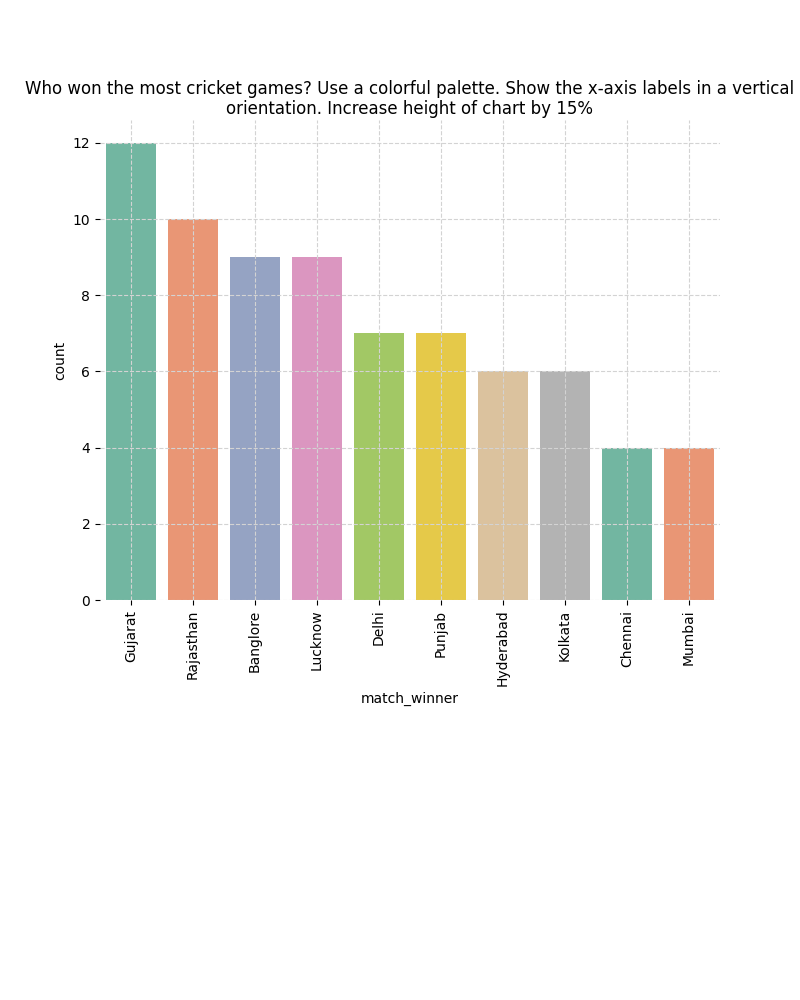

In [12]:
user_query = "Who won the most cricket games? Use a colorful palette. Show the x-axis labels in a vertical orientation. Increase height of chart by 15%"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config, library="matplotlib")  
charts[0]